In [2]:
from DDPM_tools import train, DiffusionTools
from types import SimpleNamespace
from DDPM_model import UNet, SimpleUnet
import torch
from DDPM_utils import save_images
from torchvision import transforms
import matplotlib.pyplot as plt
import PIL

In [2]:
args = SimpleNamespace(
    run_name="DDPM_Unconditional_64",
    epochs = 100,
    batch_size=10,
    image_size=64,
    dataset_path=r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\data\figure_B\Output",
    result_path="results",
    model_path=r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\saved_models",
    device="cuda",
    lr=3e-4
)
print(args)

namespace(run_name='DDPM_Unconditional_64', epochs=100, batch_size=10, image_size=64, dataset_path='C:\\Users\\20202137\\OneDrive - TU Eindhoven\\Programming\\Python\\MachineLearning\\MachineLearningModels\\data\\figure_B\\Output', result_path='results', model_path='C:\\Users\\20202137\\OneDrive - TU Eindhoven\\Programming\\Python\\MachineLearning\\MachineLearningModels\\saved_models', device='cuda', lr=0.0003)


In [3]:
model = UNet()
print("Num params: ", sum(p.numel() for p in model.parameters()))
model

Num params:  23332739


UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): GroupNorm(1, 64, eps=1e-05, affine=True)
      (2): GELU(approximate='none')
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): GroupNorm(1, 64, eps=1e-05, affine=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): GroupNorm(1, 64, eps=1e-05, affine=True)
          (2): GELU(approximate='none')
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): GroupNorm(1, 64, eps=1e-05, affine=True)
        )
      )
      (2): DoubleConv(
        (double_conv): Sequential(
        

In [4]:
train(args)

06:19:33 - INFO: Starting epoch 0:
100%|██████████| 100/100 [00:54<00:00,  1.82it/s, MSE=0.0875]
06:20:28 - INFO: Sampling 10 images
999it [01:56,  8.61it/s]
06:22:24 - INFO: Starting epoch 1:
100%|██████████| 100/100 [01:00<00:00,  1.65it/s, MSE=0.0506]
06:23:25 - INFO: Sampling 10 images
999it [01:57,  8.49it/s]
06:25:23 - INFO: Starting epoch 2:
100%|██████████| 100/100 [01:09<00:00,  1.44it/s, MSE=0.0349]
06:26:32 - INFO: Sampling 10 images
999it [01:59,  8.36it/s]
06:28:32 - INFO: Starting epoch 3:
100%|██████████| 100/100 [01:07<00:00,  1.47it/s, MSE=0.019]
06:29:39 - INFO: Sampling 10 images
999it [01:57,  8.48it/s]
06:31:37 - INFO: Starting epoch 4:
100%|██████████| 100/100 [01:05<00:00,  1.52it/s, MSE=0.0399]
06:32:43 - INFO: Sampling 10 images
999it [01:56,  8.60it/s]
06:34:39 - INFO: Starting epoch 5:
100%|██████████| 100/100 [01:03<00:00,  1.58it/s, MSE=0.0233]
06:35:43 - INFO: Sampling 10 images
999it [01:57,  8.50it/s]
06:37:41 - INFO: Starting epoch 6:
100%|██████████| 1

In [4]:
model = SimpleUnet()
model.load_state_dict(torch.load(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\saved_models\DDPM_Unconditional_64.pth"))
model.eval()

SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

In [8]:
model.to("cuda")
diffusion = DiffusionTools()
image = diffusion.sample(model, 1)

09:38:35 - INFO: Sampling 1 images
999it [00:24, 41.08it/s]


In [20]:
save_images(image, r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\DDPM_improved1\results\DDPM_Unconditional_64\result.png")

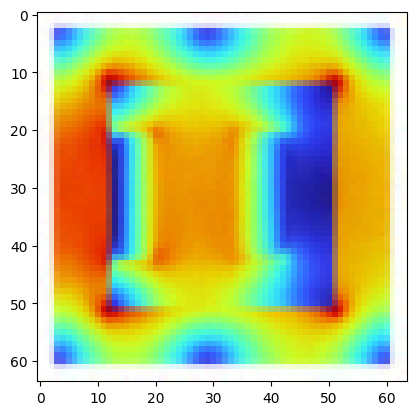

In [9]:
image = transforms.ToPILImage()(image[0])
plt.imshow(image)

In [7]:
image.save(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\DDPM_improved1\results\DDPM_Unconditional_64\result2.png")